# **MAIZE CROP YIELD IN DIFFERENT REGIONS OVER SEVERAL YEARS**

### Features description

* __State:__ This column represents the geographical location in Nigeria where the data was collected,
they are Pharcourt, Ibadan, Kaduna, Kano etc.


* __Year:__ This column indicates the year in which the data was recorded. Each row in the dataset corresponds to a specific year.


* __Tmn (daily temperature):__ This refers to the minimum daily temperature recorded for that year and location. It provides insights into the colder periods experienced during the year.


* __Tmx (daily temperature):__ This represents the maximum daily temperature recorded. It gives an idea of the warmer periods experienced during the year.


* __Rainfall:__ This column shows the amount of rainfall recorded in millimeters. It's an important factor for crop growth as it indicates the availability of water for the crops.


* __relative_humidity:__ This is the relative humidity recorded during the year. Humidity levels can affect plant health and growth.


* __Solar_radiation:__ Solar radiation indicates the amount of solar energy received. It's an important factor as it influences photosynthesis and overall plant growth.


* __Sunshune_hour:__ This column denotes the number of hours of sunshine experienced. Sunlight is essential for plant growth and energy production through photosynthesis.


* __wind_speed:__ Wind speed is the measure of how fast the wind is blowing. It can affect pollination, water loss through evaporation, and overall crop health.


* __crop:__ This specifies the type of crop being studied, which is maize in this case.


* __area:__ The area column represents the land area in which maize is cultivated in that region during the specified year.


* __Production:__ This column indicates the total production of maize in that region for the given year. It reflects the overall output of the maize crop.


* __Yield:__ The yield column represents the yield of maize production per unit area. It shows how efficiently the land was used to produce maize.

### Important Metrics:

Since its a regression problem because the target column `Yield` is a continous number ranging from 2 to 8, the selected metrics are those that explain the degree of deviation between the predicted and actual values.

* MAE (Mean Absolute Error)
* MSE (Mean Squared Error)
* RMSE (Root Mean Squared Error)

Importing the necessary packages

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

Loading the dataset

In [60]:
imported_dataframe = pd.read_excel('./dataset/dataset.xlsx')
imported_dataframe.head()

,State,YEAR,Tmn,daily_temperature,rainfall,relative_humidity,Solar_radiation,Sunshune_hour,wind_speed,crop,area,Production,Yield
0,Pharcourt,1994,26.575,12.65,2422.8,79.750000,15.30,5.25,3.00,maize,256,1598.406255,6.243774
1,Pharcourt,1995,26.975,11.15,2490.9,83.500000,13.85,5.80,1.45,maize,250,1481.789533,5.927158
2,Pharcourt,1996,27.825,10.35,2419.5,85.833333,13.85,5.20,1.65,maize,340,1967.296413,5.786166
3,Pharcourt,1997,27.350,10.30,1924.2,82.916667,13.90,5.05,1.85,maize,276,1482.270330,5.370545
4,Pharcourt,1998,26.650,10.60,2569.1,81.416667,14.05,5.45,2.40,maize,287,1684.423407,5.869071


### EXPLORATORY DATA ANALYSIS

In [61]:
print("Sample size:", len(imported_dataframe))
print("Number of features:", len(imported_dataframe.columns)-1)
print("Features name:", tuple(imported_dataframe.columns[:-1]))
print("Target name:", imported_dataframe.columns[-1])
print("number of missing values:", imported_dataframe.isna().sum().sum())

Sample size: 229
Number of features: 12
Features name: ('State', 'YEAR', 'Tmn', 'daily_temperature', 'rainfall', 'relative_humidity', 'Solar_radiation', 'Sunshune_hour', 'wind_speed', 'crop', 'area', 'Production')
Target name: Yield
number of missing values: 0


In [62]:
# Statistica description
imported_dataframe.describe()

,YEAR,Tmn,daily_temperature,rainfall,relative_humidity,Solar_radiation,Sunshune_hour,wind_speed,area,Production,Yield
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,2007.829694,24.450481,13.323490,1346.174920,65.745248,15.549993,7.179146,7.192004,288.895197,1434.108911,5.019863
std,8.304606,2.791231,2.763274,489.685946,14.473405,1.758326,1.588293,2.949854,42.142380,203.220118,0.713498
min,1994.000000,16.274000,7.500000,272.302000,6.225000,11.395000,1.800000,1.050000,174.000000,1031.558000,3.267207
25%,2001.000000,22.312000,10.822000,1143.000000,52.538287,14.055000,6.055000,4.450000,258.000000,1303.056460,4.642609
50%,2008.000000,23.625000,12.650000,1279.400000,69.165000,15.650000,7.451000,7.600000,283.000000,1413.401000,4.972058
75%,2015.000000,27.135130,16.069002,1432.424000,79.511000,16.956000,8.400000,9.755000,322.000000,1552.305000,5.410476
max,2022.000000,29.850000,18.904000,3046.700000,89.588000,19.104000,9.754000,11.851000,392.000000,2157.890699,7.514024


**State VS Yield**

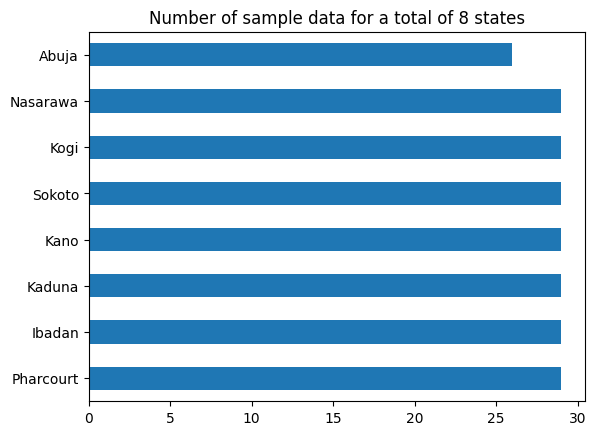

In [63]:
_vc = imported_dataframe.State.value_counts()
_vc.plot.barh(title=f'Number of sample data for a total of {len(_vc)} states');

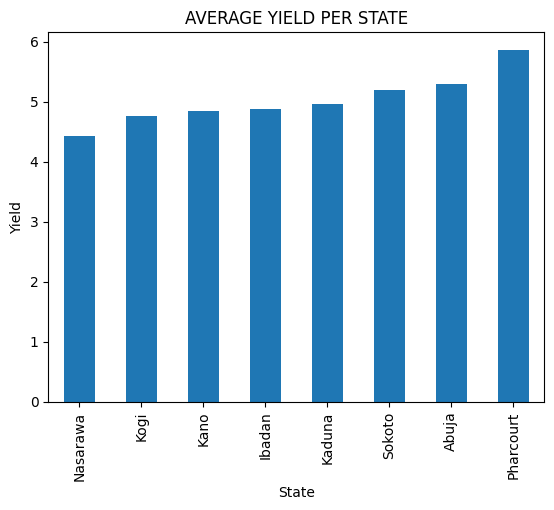

In [64]:
imported_dataframe.groupby('State')['Yield'].mean().sort_values(ascending=True).plot.bar(title='AVERAGE YIELD PER STATE', ylabel='Yield');

We can see Nasarawa state has the lowest average yield and Port Harcort has the heighest.

In [65]:
# Python funtion to convert states to numerical values that can be processed by the model.

def applyEncodeStateFeature(state:str) -> int:
    '''
    Should be used with the pandas apply or map method to convert the categorical values to numerical values.
    '''
    categories = {
    "Nasarawa": 0,
    "Kano": 1,
    "Kogi": 2,
    "Ibadan": 3,
    "Kaduna": 4,
    "Sokoto": 5,
    "Abuja": 6,
    "Pharcourt": 7
    }
    return categories.get(state)

_state = 'Kano'
print(f"{_state}: {applyEncodeStateFeature(_state)}")

Kano: 1


**YEAR VS Yield**

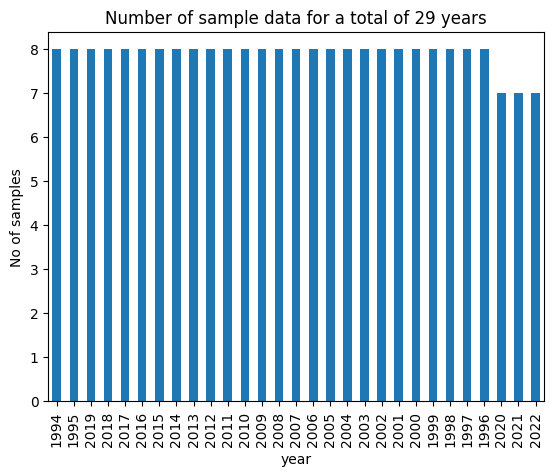

In [66]:
_vc = imported_dataframe.YEAR.value_counts()
_vc.plot.bar(title=f'Number of sample data for a total of {len(_vc)} years', ylabel='No of samples', xlabel='year');

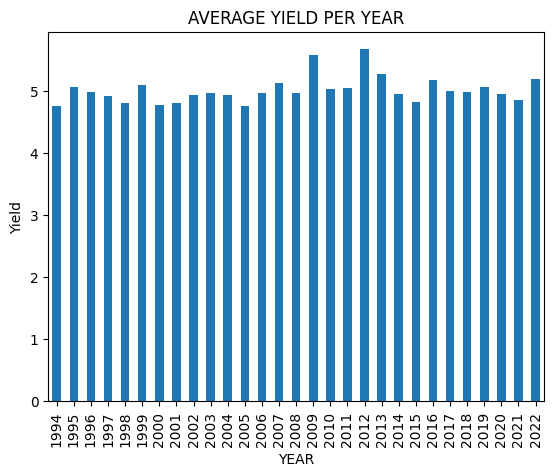

In [67]:
imported_dataframe.groupby('YEAR')['Yield'].mean().plot.bar(title='AVERAGE YIELD PER YEAR', ylabel='Yield');

**Crop VS Yield**

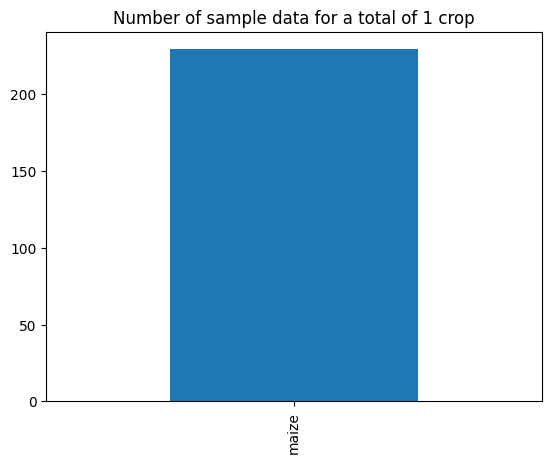

In [68]:
_vc = imported_dataframe.crop.value_counts()
_vc.plot.bar(title=f'Number of sample data for a total of {len(_vc)} crop');

*We only have maize crop so we will drop the crop feature as it has no variance and will not contribute to the yield prediction.*

In [69]:
def applyDropCropColumn(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Removes the crop feature column if it exists in the pandas table.
    '''
    return df.drop('crop', axis=1) if 'crop' in df.columns else df

**CORRELATION BETWEEN THE NUMERICAL FEATURES AND YIELD**

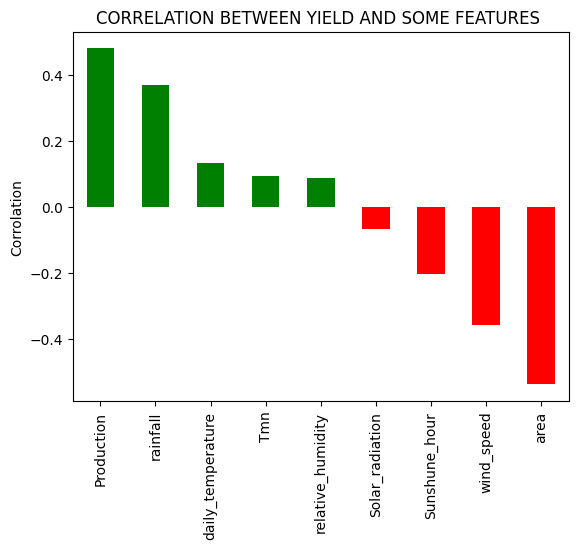

In [70]:
_df = imported_dataframe[imported_dataframe.columns[2:]].corr()['Yield'].sort_values(ascending=False)[1:]
_df.plot.bar(color=(_df > 0).map({True: 'g', False: 'r'}), ylabel='Corrolation', title='CORRELATION BETWEEN YIELD AND SOME FEATURES ');

Features such as production are highly positively correlated to the yield, while area is negatively correlated to the yield. The Features Tmn, relative_humidity, Solar_radiation are almost zero, therefore has little correlation and should be removed.

### FEATURE ENGINEERING

In [71]:
def process_data(df:pd.DataFrame) -> pd.DataFrame:
    df = applyDropCropColumn(df)
    df['State'] = df['State'].apply(applyEncodeStateFeature)
    df = df.drop(['Tmn', 'relative_humidity', 'Solar_radiation'], axis=1)
    return df

In [72]:
cleaned_dataframe = process_data(imported_dataframe)
cleaned_dataframe.head()

,State,YEAR,daily_temperature,rainfall,Sunshune_hour,wind_speed,area,Production,Yield
0,7,1994,12.65,2422.8,5.25,3.00,256,1598.406255,6.243774
1,7,1995,11.15,2490.9,5.80,1.45,250,1481.789533,5.927158
2,7,1996,10.35,2419.5,5.20,1.65,340,1967.296413,5.786166
3,7,1997,10.30,1924.2,5.05,1.85,276,1482.270330,5.370545
4,7,1998,10.60,2569.1,5.45,2.40,287,1684.423407,5.869071


In [73]:
# plt.bar(cleaned_dataframe.columns[:-1], _test_model.feature_importances_)
# plt.xticks(rotation=90);


### BASE LINE MODEL EVALUATION

Split data into testing and training set

In [74]:
X, Y = cleaned_dataframe[cleaned_dataframe.columns[:-1]], cleaned_dataframe[cleaned_dataframe.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(194, 35, 194, 35)

Training models

In [75]:
rf_model = RandomForestRegressor()
rf_model_ss = make_pipeline(StandardScaler(), RandomForestRegressor())
svr_model_ss = make_pipeline(StandardScaler(), SVR())
svr_model = SVR()
(
    rf_model.fit(X_train, y_train), 
    svr_model.fit(X_train, y_train),
    rf_model_ss.fit(X_train, y_train), 
    svr_model_ss.fit(X_train, y_train)
)

(RandomForestRegressor(),
 SVR(),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor', RandomForestRegressor())]),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]))

Evaluating models against training set

In [76]:
def evaluate_models(models:dict, X, Y):
    result = {}
    for name, model in models.items():
        y_pred = model.predict(X)
        result[name] = {
            # "R2": r2_score(Y, y_pred),
            "MAE": mean_absolute_error(Y, y_pred),
            "MSE": mean_squared_error(Y, y_pred),
            "RMSE": mean_squared_error(Y, y_pred, squared=False),
        }
    return result

def result2dataframe(result):
    _name = list(result.keys())
    _cat = list(result[_name[0]].keys())
    _data = {}
    for _n in _name:
        _data[_n] = [result[_n][i] for i in _cat]
    return pd.DataFrame(_data, columns=_data.keys(), index=_cat)

def plot_result(result):
    result2dataframe(result).plot.bar(title="Metrics Result")
    plt.show();

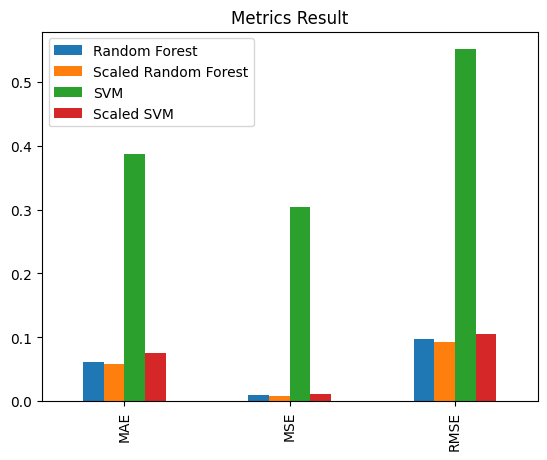

In [77]:
r = evaluate_models({
    'Random Forest': rf_model, 
    'Scaled Random Forest': rf_model_ss, 
    'SVM': svr_model, 
    'Scaled SVM': svr_model_ss
    }, X_train, y_train)
plot_result(r)


Evaluating models against test set

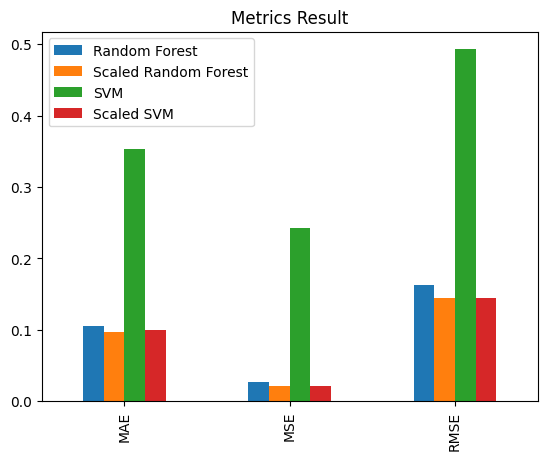

In [78]:
r = evaluate_models({
    'Random Forest': rf_model, 
    'Scaled Random Forest': rf_model_ss, 
    'SVM': svr_model, 
    'Scaled SVM': svr_model_ss
    }, X_test, y_test)
plot_result(r)

Save model

In [79]:
new_df = result2dataframe(r)
new_df

,Random Forest,Scaled Random Forest,SVM,Scaled SVM
MAE,0.104742,0.097329,0.352822,0.099171
MSE,0.026483,0.020932,0.243125,0.020685
RMSE,0.162735,0.144678,0.493077,0.143821


In [80]:
new_df[new_df.columns[:2]].T.min(), new_df[new_df.columns[2:4]].T.min()

(MAE     0.097329
 MSE     0.020932
 RMSE    0.144678
 dtype: float64,
 MAE     0.099171
 MSE     0.020685
 RMSE    0.143821
 dtype: float64)

In [81]:
with open("./models/rf_model1.pkl", "wb") as file:
    pickle.dump(rf_model, file)

with open("./models/svm_model1.pkl", "wb") as file:
    pickle.dump(svr_model_ss, file)

### HOT ENCODE STATE MODEL EVALUATION

Split data into testing and training set

In [82]:
encoded_dataframe = pd.get_dummies(cleaned_dataframe, columns=['State'], drop_first=True)
X2 = encoded_dataframe.copy()
Y2 = X2.pop("Yield")
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=.15, random_state=1)
len(X_train2), len(X_test2), len(y_train2), len(y_test2)

(194, 35, 194, 35)

Training models

In [83]:
rf_model2 = RandomForestRegressor()
svr_model2 = SVR()
rf_model2_ss = make_pipeline(StandardScaler(), RandomForestRegressor())
svr_model2_ss = make_pipeline(StandardScaler(), SVR())
(
    rf_model2.fit(X_train2, y_train2), 
    rf_model2_ss.fit(X_train2, y_train2), 
    svr_model2.fit(X_train2, y_train2),
    svr_model2_ss.fit(X_train2, y_train2),
)

(RandomForestRegressor(),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor', RandomForestRegressor())]),
 SVR(),
 Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]))

Evaluating models against training set

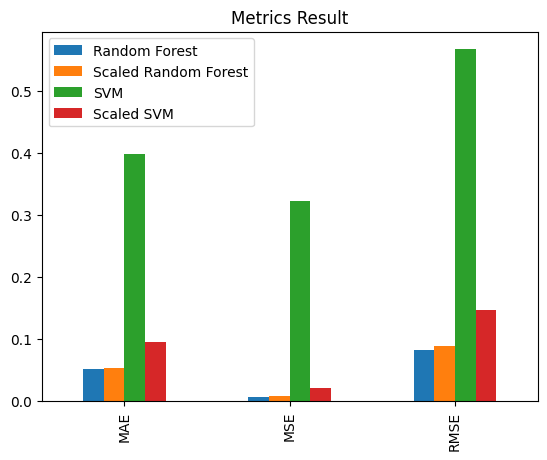

In [84]:
r2 = evaluate_models({
    'Random Forest': rf_model2, 
    'Scaled Random Forest': rf_model2_ss, 
    'SVM': svr_model2, 
    'Scaled SVM': svr_model2_ss
    }, X_train2, y_train2)
plot_result(r2)

Evaluating models against test set

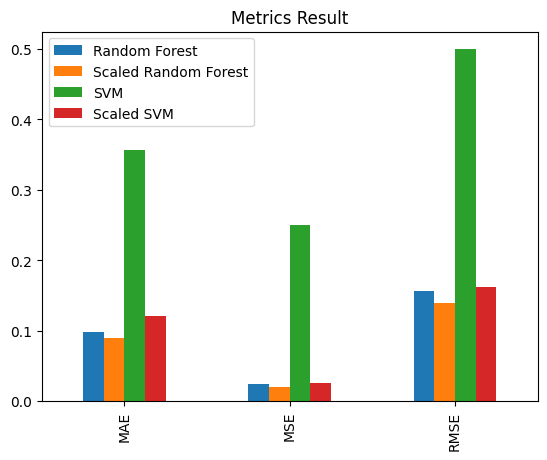

In [85]:
r2 = evaluate_models({
    'Random Forest': rf_model2, 
    'Scaled Random Forest': rf_model2_ss, 
    'SVM': svr_model2, 
    'Scaled SVM': svr_model2_ss
    }, X_test2, y_test2)
plot_result(r2)

Save model

In [86]:
new_df = result2dataframe(r2)
new_df

,Random Forest,Scaled Random Forest,SVM,Scaled SVM
MAE,0.097613,0.090165,0.356449,0.120367
MSE,0.024683,0.019445,0.249868,0.026069
RMSE,0.157109,0.139444,0.499868,0.161460


In [87]:
new_df[new_df.columns[:2]].T.min(), new_df[new_df.columns[2:4]].T.min()

(MAE     0.090165
 MSE     0.019445
 RMSE    0.139444
 dtype: float64,
 MAE     0.120367
 MSE     0.026069
 RMSE    0.161460
 dtype: float64)

In [88]:
with open("./models/rf_model2.pkl", "wb") as file:
    pickle.dump(rf_model2_ss, file)

with open("./models/svm_model2.pkl", "wb") as file:
    pickle.dump(svr_model2_ss, file)

### RESULT EVALUATION

Load saved models

In [89]:
with open("./models/rf_model1.pkl", "rb") as file:
    rf_model1 = pickle.load(file)

with open("./models/svm_model1.pkl", "rb") as file:
    svm_model1 = pickle.load(file)

with open("./models/rf_model2.pkl", "rb") as file:
    rf_model2 = pickle.load(file)

with open("./models/svm_model2.pkl", "rb") as file:
    svm_model2 = pickle.load(file)

In [90]:
result = evaluate_models({
    'Random Forest 1': rf_model1, 
    'SVM 1': svm_model1, 
    }, X_test, y_test)

result2 = evaluate_models({
    'Random Forest 2': rf_model2, 
    'SVM 2': svm_model2, 
    }, X_test2, y_test2)

result.update(result2)
result2dataframe(result)

,Random Forest 1,SVM 1,Random Forest 2,SVM 2
MAE,0.104742,0.099171,0.090165,0.120367
MSE,0.026483,0.020685,0.019445,0.026069
RMSE,0.162735,0.143821,0.139444,0.161460


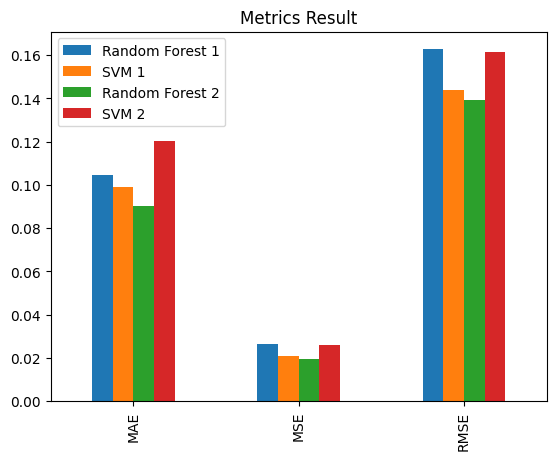

In [91]:
plot_result(result)

Important features in the best model

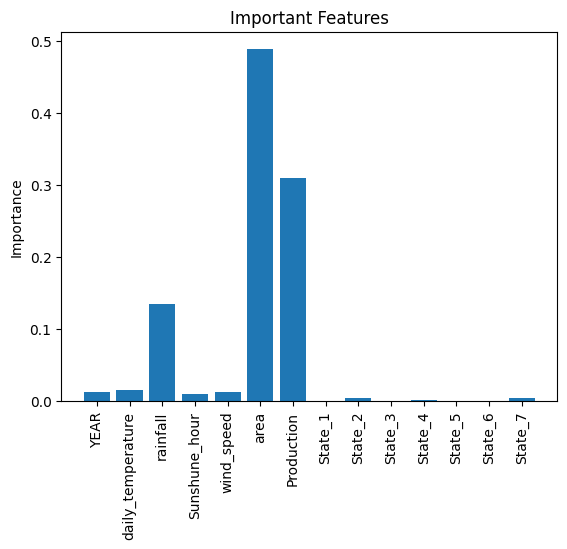

In [92]:
rf_model2[-1].feature_importances_
plt.bar(X_train2.columns, rf_model2[-1].feature_importances_)
plt.xticks(rotation=90);
plt.title("Important Features");
plt.ylabel("Importance");